## Group Project Part 2
(Deadline 13.11.2023 CET 23:59)

### Project Title: Building a Smart Business Manager with APIs

### Step 3: Decision Making (30 points)
Clean all the data you collected
Combine the data you've collected from the weather and non-meteorological APIs to make informed decisions about the business  stand. 
Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

**Task 3.1:** Location Selection (15 points)
Determine where to set up your business stand based on weather conditions, local attractions, or events. 
The location should maximize customer traffic and sales.
Support your decision with descriptive statistics and basic data visualization.

**Task 3.2:** Inventory Management (15 points)
Based on weather forecasts and expected sales, decide how much inventory to carry.
Ensure you have enough ingredients on busy days, but minimize waste on slower days.


**3.1**

In [179]:
import requests
import pandas as pd
data=pd.read_csv('rooftop_data.csv')
data.dropna(inplace=True)
price_evaluation=[]
for i in data['price range']:
    if (len(i))==1:
        price_evaluation.append("inexpensive")
    elif (len(i))==2:
        price_evaluation.append("moderate")
    elif (len(i))==3:
        price_evaluation.append("expensive")
    else:
        price_evaluation.append("luxury")       
data["price evaluation"]=price_evaluation
data

,name,latitude,longtitude,rating,review count,price range,city,price evaluation
0,Klunkerkranich,52.482160,13.431854,4.3,122,€€,Berlin,moderate
3,Monkey Bar,52.505377,13.336890,3.3,164,€€€,Berlin,expensive
4,Bebel Bar & Lounge,52.515790,13.394244,4.0,17,€€€€,Berlin,luxury
5,Soho House,52.527609,13.415473,3.8,88,€€€,Berlin,expensive
6,Deck 5,52.549561,13.415130,3.6,109,€€,Berlin,moderate
7,Weekend Club,52.523080,13.416489,3.1,114,€€€,Berlin,expensive
8,The Circus,52.529403,13.401310,4.5,35,€€,Berlin,moderate
9,Amano Rooftop Bar,52.528246,13.402823,3.8,21,€€€,Berlin,expensive
10,The Exchange,40.037094,-76.305147,3.6,143,$$,Manheim,moderate
11,The Sandwich Factory Sports Lounge,40.095272,-76.305423,3.2,83,$,Manheim,inexpensive


In [180]:
import requests
import pandas as pd
from datetime import datetime, timedelta

date_str1 = input("Enter the first date (yyyy-mm-dd): ")
date_str2 = input("Enter the second date (yyyy-mm-dd): ")

city=input("Enter the city you want Berlin,Manheim,Frankfurt:")
if city=="Berlin":
    lat=52
    lon=13
elif city=="Manheim":
        lat=40
        lon=-76
elif city=="Frankfurt":
            lat=50
            lon=8

date_format = "%Y-%m-%d"
date1 = datetime.strptime(date_str1, date_format)
date2 = datetime.strptime(date_str2, date_format)
days_difference = (date2 - date1).days
url = "https://meteostat.p.rapidapi.com/point/daily"

querystring = {"lat":lat,"lon":lon,"start":date_str1,"end":date_str2,"alt":"184"}

headers = {
	"X-RapidAPI-Key": "647624aa1dmsh656f4c5b5e614f8p10bc1djsn052c2e87053a",
	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

weather_data=[]
for i in range(days_difference): 
    weather_data.append([response.json()['data'][i]])

list = [item for sublist in weather_data for item in sublist]
df=pd.DataFrame(list)
df

        
    

    

KeyboardInterrupt: Interrupted by user

In [181]:

date_str1 = input("Enter the first date (yyyy-mm-dd): ")
date_str2 = input("Enter the second date (yyyy-mm-dd): ")

a=data[data['city']=="Manheim"]
b=data[data['city']=="Berlin"]
c=data[data['city']=="Frankfurt"]
avg_Manheim=a['rating'].mean()
avg_Berlin=b['rating'].mean()
avg_Frankfurt=c['rating'].mean()
total_averages={'cities':["Manheim","Berlin","Frankfurt"],'average rating':[avg_Manheim,avg_Berlin,avg_Frankfurt]}
avg=pd.DataFrame(total_averages)
min_city=avg.loc[avg['average rating'].idxmin(),'cities']
print(f"It is less competitive at {min_city}")

def weather_by_day(min_city,date_str1,date_str2):
    if min_city=="Berlin":
        lat=52
        lon=13
    elif min_city=="Manheim":
        lat=40
        lon=-76
    elif min_city=="Frankfurt":
        lat=50
        lon=8

    date_format = "%Y-%m-%d"
    date1 = datetime.strptime(date_str1, date_format)
    date2 = datetime.strptime(date_str2, date_format)
    days_difference = (date2 - date1).days
    url = "https://meteostat.p.rapidapi.com/point/daily"

    querystring = {"lat":lat,"lon":lon,"start":date_str1,"end":date_str2,"alt":"184"}

    headers = {
    	"X-RapidAPI-Key": "647624aa1dmsh656f4c5b5e614f8p10bc1djsn052c2e87053a",
    	"X-RapidAPI-Host": "meteostat.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)

    weather_data=[]
    for i in range(days_difference): 
        weather_data.append([response.json()['data'][i]])

    list = [item for sublist in weather_data for item in sublist]
    df=pd.DataFrame(list)
    df
    for index, row in df.iterrows():
        if row['prcp'] > 1:
            print("Do not open today, it's raining")
            open = False
        elif row['tavg'] < 5:
            print("Do not open today, it's too cold")
            open = False
        else:
            print("You can open today")
            open = True
    return df
weather_by_day(min_city,date_str1,date_str2)   

Enter the first date (yyyy-mm-dd):  2023-06-01
Enter the second date (yyyy-mm-dd):  2023-06-02


It is less competitive at Manheim
You can open today


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-06-01,20.6,12.1,29.1,0.0,None,8.0,2.0,None,1019.4,None


**we end up choosing Manheim as the location because it has the worst rating for rooftop bars and every day choose if we open or not based on the weather**



In [140]:
a=data[data['city']=="Manheim"]
b=data[data['city']=="Berlin"]
c=data[data['city']=="Frankfurt"]
avg_Manheim=a['rating'].mean()
avg_Berlin=b['rating'].mean()
avg_Frankfurt=c['rating'].mean()
total_averages={'cities':["Manheim","Berlin","Frankfurt"],'average rating':[avg_Manheim,avg_Berlin,avg_Frankfurt]}
avg=pd.DataFrame(total_averages)
avg
data[["rating","review count"]].describe()

,rating,review count
count,17.000000,17.000000
mean,3.547059,93.352941
std,0.511270,48.359256
min,2.400000,17.000000
25%,3.200000,77.000000
50%,3.600000,96.000000
75%,3.800000,122.000000
max,4.500000,167.000000


In [141]:
avg

,cities,average rating
0,Manheim,3.300000
1,Berlin,3.800000
2,Frankfurt,3.366667


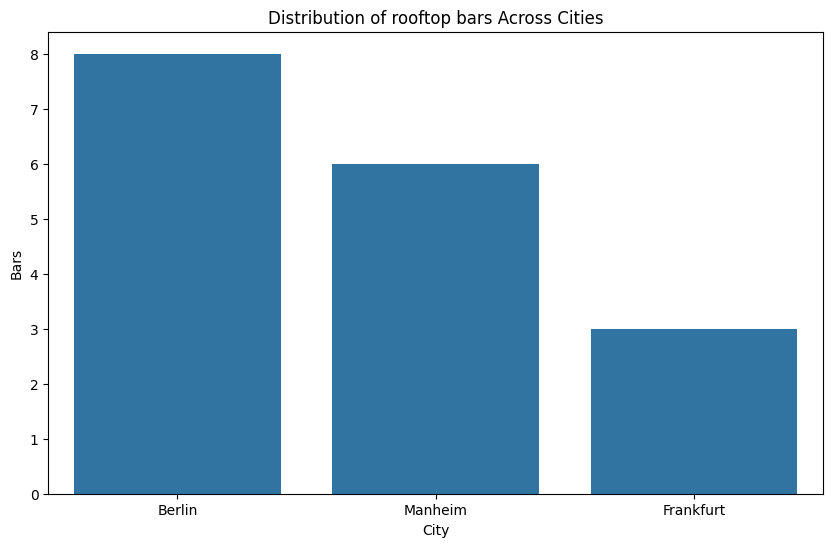

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# City Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=data)
plt.title('Distribution of rooftop bars Across Cities')
plt.xlabel('City')
plt.ylabel('Bars')
plt.show()


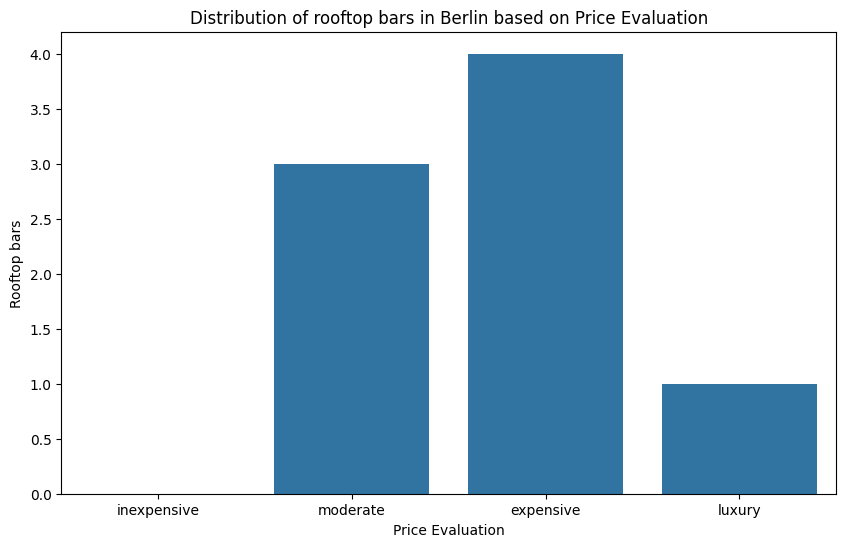

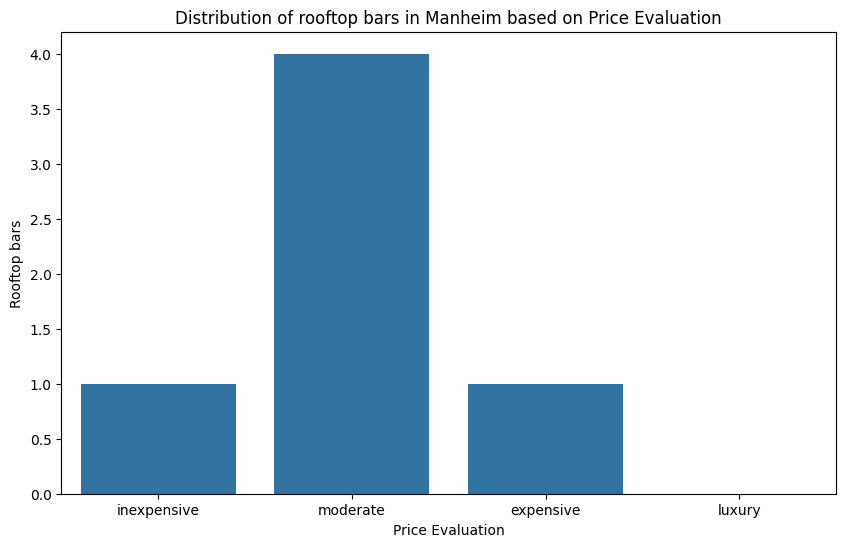

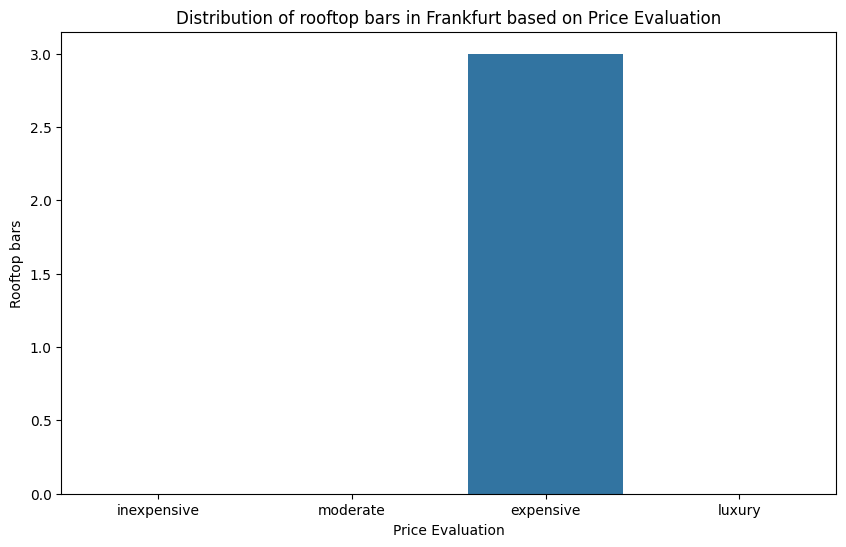

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

price_order = ['inexpensive', 'moderate', 'expensive', 'luxury']


plt.figure(figsize=(10, 6))
sns.countplot(x='price evaluation', data=data[data['city']=="Berlin"], order=price_order)
plt.title('Distribution of rooftop bars in Berlin based on Price Evaluation')
plt.xlabel('Price Evaluation')
plt.ylabel('Rooftop bars')

plt.figure(figsize=(10, 6))
sns.countplot(x='price evaluation', data=data[data['city']=="Manheim"], order=price_order)
plt.title('Distribution of rooftop bars in Manheim based on Price Evaluation')
plt.xlabel('Price Evaluation')
plt.ylabel('Rooftop bars')

plt.figure(figsize=(10, 6))
sns.countplot(x='price evaluation', data=data[data['city']=="Frankfurt"], order=price_order)
plt.title('Distribution of rooftop bars in Frankfurt based on Price Evaluation')
plt.xlabel('Price Evaluation')
plt.ylabel('Rooftop bars')
plt.show()


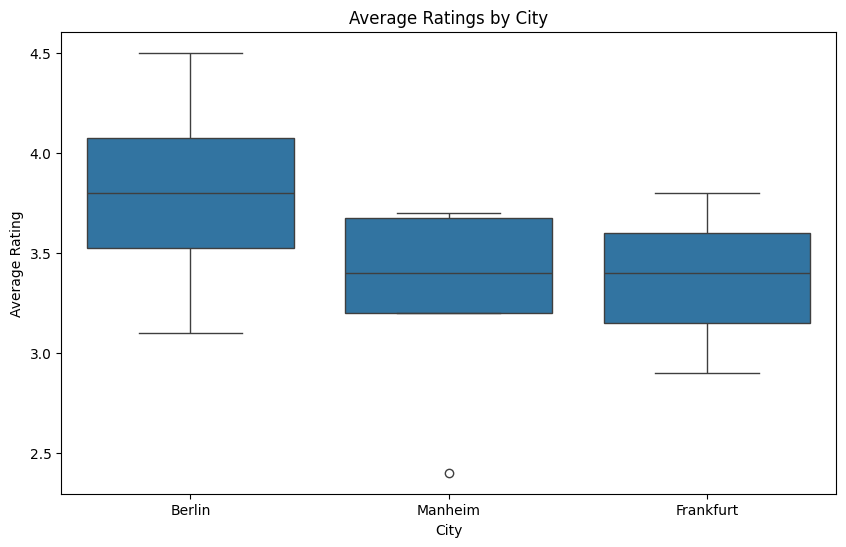

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='rating', data=data)
plt.title('Average Ratings by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()


**3.2**

In [183]:
standard_inv=100
good_temp=16
df['tavg']

# def inventory_management(min_city):
#     current_temp=data   
      
    

0     7.6
1     5.1
2     2.6
3     3.8
4     2.1
5     1.6
6     6.1
7     9.7
8     0.7
9     0.5
10    2.1
11    3.6
12    7.3
13    4.6
14    6.4
15    3.8
16    2.2
17    3.1
18    2.7
19    1.3
20    7.0
21    1.8
22    3.1
23    3.4
24    5.2
25    2.6
26   -0.3
27   -1.7
28   -2.1
29   -8.2
30    0.6
Name: tavg, dtype: float64